# Cars4U Dataset

## Description 

This 

### Objective

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.

## Importing Libraries

Here are the libraries utilised and needed for this notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import necessary libraries.

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string


There are 7253 rows and 13 columns.


In [3]:
# copying the data to another variable to aviod changes to the original data
data=df.copy()

#therefore this means that "data" is the copy of the dataset which is the original one

## Exploratory Data Analysis (EDA)

This is used to have a general understanding of the original dataset, such as how many rows or columns are there, the datatypes and whether there are null values or missing values.

### Viewing the first and last 5 rows of the dataset

In [4]:
# Checking the first 5 entries of dataset 
df.head() 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
#this will display the last 5 rows of the dataset
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


### Showing the data type of each column in the data frame

In [6]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

##### From the analysis above it can be deduced that year, kilometers_driven columns are numerical data while name, location, fuel_type, transmission, owner_type, mileage, engine, power and new_price columns are of object data type and price and seats are float data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


## Understanding the shape of the dataset

In [8]:
df.shape

(7253, 13)

#### this reveals that the dataset has 7253 rows and 13 columns

## The column names in the dataset

In [9]:
df.columns

df.loc[df['Owner_Type']=='NaN',]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,


## Summary of the Dataset

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Insights

- Name has the highest amount of unique values followed by New_price while Location, Fuel_type, Transmisson ND OWNER_TYPE also include unique values.
- Location has 11 unique values thismeans that the data was collected from 11 different locations in india.
- The year of the used cars started from 2011 to 2019
- The average amount of kilometers driven by a car is 53,416km
- The most frequent fuel_type used by these cars is diesel
- Most of the used cars in the dataset are manual cars.
- The average seats in the cars in this dataframe are 5 seats
- The average price of the car is 9.479 Lakhs
- Since New_price has alot of missing values we might decide to drop it while further analysing this dataset
- We would also be converting Mileage, Engine and Power into numerical data

## Check for Null values in the dataset

In [11]:
df.apply(lambda x:sum(x.isnull()))

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### This shows that there are INDEED NULL VALUES in this dataset. It can be deduced that there are null values in the following columns: Mileage, Engine, Power, Seats, New_Price and Price.

## Checking For Missing Values in the Dataset

In [12]:
data = df 
#Finding if missing values  
data.isnull().any()  

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                 True
dtype: bool

#### This reveals that there are also MISSING VALUES present in this dataset which will require further analysis as we continue.

## To check for the size of the data frame

In [13]:
df.size

94289

## Having a statistical summary of the dataset

In [14]:
df.describe()


,Year,Kilometers_Driven,Seats,Price
count,7253.000,7253.000,7200.000,6019.000
mean,2013.365,58699.063,5.280,9.479
std,3.254,84427.721,0.812,11.188
min,1996.000,171.000,0.000,0.440
25%,2011.000,34000.000,5.000,3.500
50%,2014.000,53416.000,5.000,5.640
75%,2016.000,73000.000,5.000,9.950
max,2019.000,6500000.000,10.000,160.000


In [15]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000,-0.188,0.008,0.305
Kilometers_Driven,-0.188,1.000,0.090,-0.011
Seats,0.008,0.090,1.000,0.052
Price,0.305,-0.011,0.052,1.000


### Checking the type and number of Seats for in the Cars

In [16]:
df['Seats'].value_counts()

5.000     6047
7.000      796
8.000      170
4.000      119
6.000       38
2.000       18
10.000       8
9.000        3
0.000        1
Name: Seats, dtype: int64

#### This reveals that most cars in this dataset are 5 seaters and there are also alot of cars with 7, 8, and 4 seats in them, while the rest of the cars in the dataset are 6, 2 and 10 are not that much but are available. However, cars with 9 and 0 seats are the least in the dataset

## Converting Mileage, Engine and Power to numerical Data

In [17]:
#this is where we start using the dataset copy which is "data" since some changes will be made and this will be to prevent any damage to the original dataset if it will be needed in further steps

data['Power'] = data['Power'].replace('bhp','', regex=True)
data['Engine'] = data['Engine'].replace('CC','',regex=True)
data['Mileage'] = data['Mileage'].replace('kmpl','', regex=True)
data['Mileage'] = data['Mileage'].replace('km/kg','', regex=True)
data['Power']=pd.to_numeric(data['Power'],downcast='integer',errors='coerce')
data['Engine']=pd.to_numeric(data['Engine'],downcast='integer',errors='coerce')
data['Mileage']=pd.to_numeric(data['Mileage'],downcast='integer',errors='coerce')

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.000,NaN,NaN,NaN,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,NaN,NaN,NaN,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7078.000,NaN,NaN,NaN,112.765,53.494,34.200,75.000,94.000,138.100,616.000


In [19]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [20]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000,7253.000,7251.000,7207.000,7078.000,7200.000,6019.000
mean,2013.365,58699.063,18.142,1616.573,112.765,5.280,9.479
std,3.254,84427.721,4.562,595.285,53.494,0.812,11.188
min,1996.000,171.000,0.000,72.000,34.200,0.000,0.440
25%,2011.000,34000.000,15.170,1198.000,75.000,5.000,3.500
50%,2014.000,53416.000,18.160,1493.000,94.000,5.000,5.640
75%,2016.000,73000.000,21.100,1968.000,138.100,5.000,9.950
max,2019.000,6500000.000,33.540,5998.000,616.000,10.000,160.000


In [21]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000,-0.188,0.322,-0.055,0.013,0.008,0.305
Kilometers_Driven,-0.188,1.000,-0.069,0.095,0.030,0.090,-0.011
Mileage,0.322,-0.069,1.000,-0.594,-0.532,-0.311,-0.307
Engine,-0.055,0.095,-0.594,1.000,0.860,0.399,0.658
Power,0.013,0.030,-0.532,0.860,1.000,0.096,0.773
Seats,0.008,0.090,-0.311,0.399,0.096,1.000,0.052
Price,0.305,-0.011,-0.307,0.658,0.773,0.052,1.000


### Observations

- this has now added the three columns Mileage, Power and Engine to numerical values
- this has also reduced the null values in Mileage 
- There are 6247 missing values in the dataset for New_Price and imputing values would be almost impossible which is why I will drop the New_Prices column

In [22]:
data.Mileage.where(data.Mileage!=0,inplace=True)
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

## Let's have a look at the graphical visualization of the data to understand it in a better way

# Univariate Analysis

- Here we will probably do some univariate anylysis that will involve using the numerical variables
- Understand the cental tendency and dispersion
- Create function that will aid in creating visual graphs such as histograms and boxplots

## Year

In [23]:
# to check how many years are used in this dataset
data['Year'].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

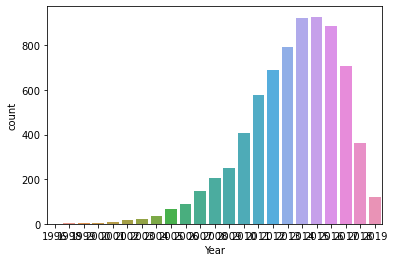

In [24]:
#graphically display the amount of years are in this dataset
sns.countplot(data['Year'])
plt.show()



#### Observation

- this graph is left skewed which explain that we have very few cars which are from 1996-2001
- Most of the cars are from the years 2007-2019
- The higheest number of cars are from the year 2015

## Fuel_Type

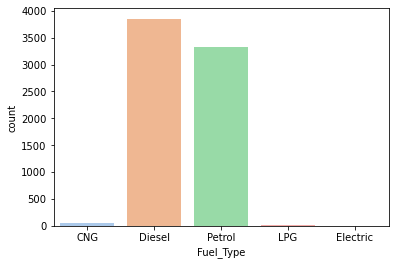

In [25]:
sns.countplot(data['Fuel_Type'],palette='pastel')
plt.show()

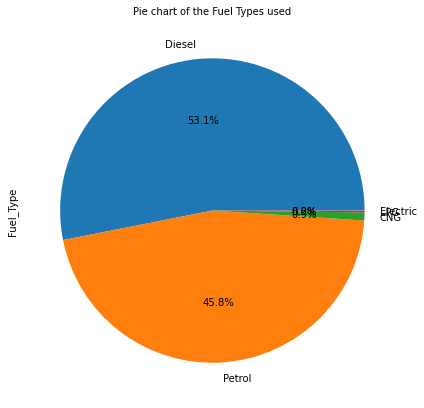

In [26]:
plt.figure(figsize=(9,7))
data.Fuel_Type.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Fuel Types used', {'fontsize':10})
plt.show()

This shows the following:
- Over 50% of the cars use Diesel as their fuel type
- A lot of cars also use Petrol but not as much as diesel
- Very few cars make use of CNG as their fuel type 
- There are hardly any cars that use LPG or any electric cars

## Owner_Type

In [27]:
# to check how many ownerships are used in this dataset
data['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

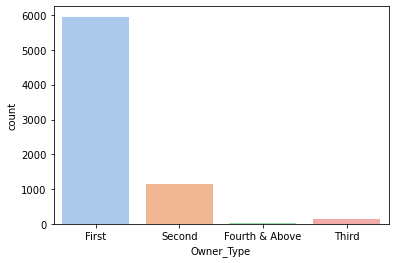

In [28]:
sns.countplot(data['Owner_Type'],palette='pastel')
plt.show()

- Most cars have only had one ownership before 
- Some cars have had second and third ownership
- Very few cars had forth and above ownership

## Seats

In [29]:
# to check how many seats are available in the cars
data['Seats'].value_counts()

5.000     6047
7.000      796
8.000      170
4.000      119
6.000       38
2.000       18
10.000       8
9.000        3
0.000        1
Name: Seats, dtype: int64

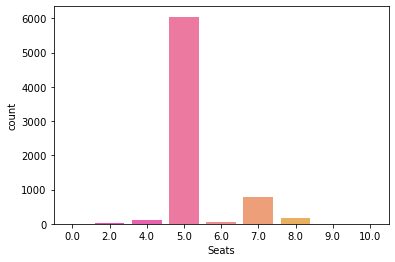

In [30]:
sns.countplot(data['Seats'],palette='spring')
plt.show()

- Over 6000 cars are 5-Seaters
- Most cars are cars are 5-seaters
- There is also a good number of cars which are 7 and 8 seaters
- This could mean that the cars in the dataset could be quite big and spacious
- There were hardly any cars with 9 or 10 seats in them 

## Location

In [31]:
# to check the locations used in this dataframe
data['Location'].value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

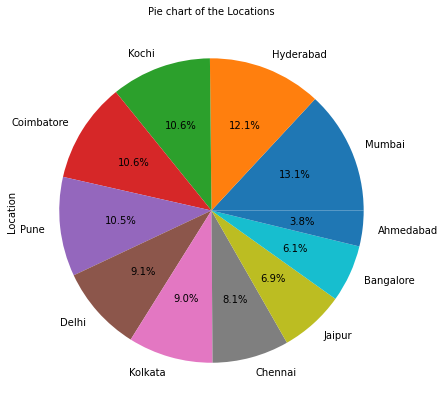

In [32]:
plt.figure(figsize=(9,7))
data.Location.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Locations', {'fontsize':10})
plt.show()

- A lot of cities were almost used equally in the locations for the cars
- The highest amount of cars that are being purchased or available is in Mumbai.
- The least location if where the cars are available or being purcahsed is in Ahmedabad.

# Distribution of Numerical Column

## Mileage

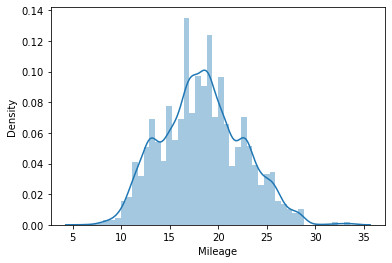

In [33]:
#graphical display of the distribution of Mileage column
sns.distplot(data['Mileage'])
plt.show()

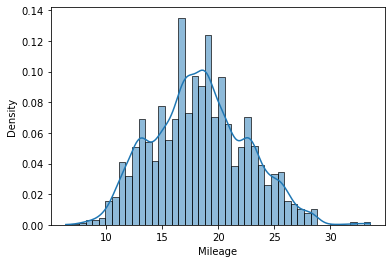

In [34]:
sns.histplot(data=df, x='Mileage', stat='density', kde=True)
plt.show()

Note:

- The graph above shows that Mileage can be normally distributed


## Engine

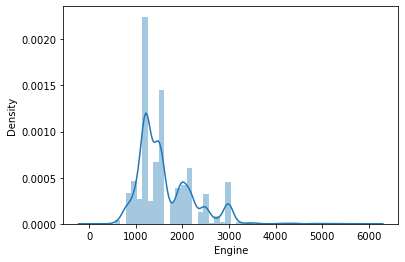

In [35]:
#graphical display of the displacement volume of engine in CC in this column
sns.distplot(data['Engine'])
plt.show()

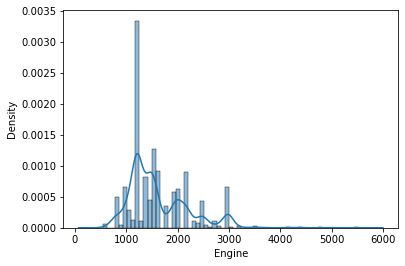

In [36]:
sns.histplot(data=df, x='Engine', stat='density', kde=True)
plt.show()

- This reveals that the the Engines are rightly skewed when the long tail is at the right side which explains that the mean is greater than the median (mean>median).
- Also the displacement volume of the engines are under the range from -500-10000

## Power

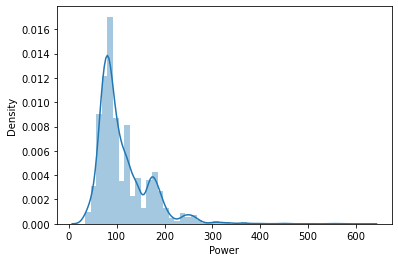

In [37]:
#graphical display of the maximum power of the engine in bhp
sns.distplot(data['Power'])
plt.show()

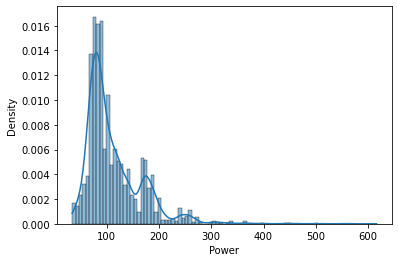

In [38]:
sns.histplot(data=df, x='Power', stat='density', kde=True)
plt.show()

- This also reveals that the graph is rightly skewed as long as the long tail is at the right side.
- This sholws that the mean is greater than the median.
- The maximum power of the engine ranges from 0 - 1000bhp

## Price

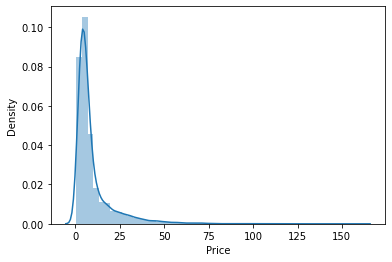

In [39]:
#graphical display of the prices of the cars
sns.distplot(data['Price'])
plt.show()

- This graph is also positively skewed
- The price of the used car ranges from -10 - 250 lakhs

# Multivariate

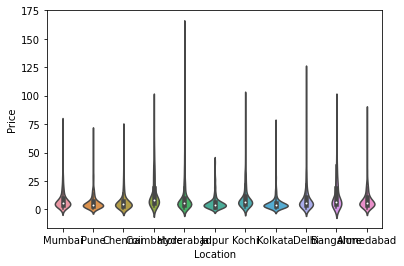

In [40]:
# a violin plot which will show the distribution of price by different locations

sns.violinplot(data=df, x='Location', y='Price')
plt.show()

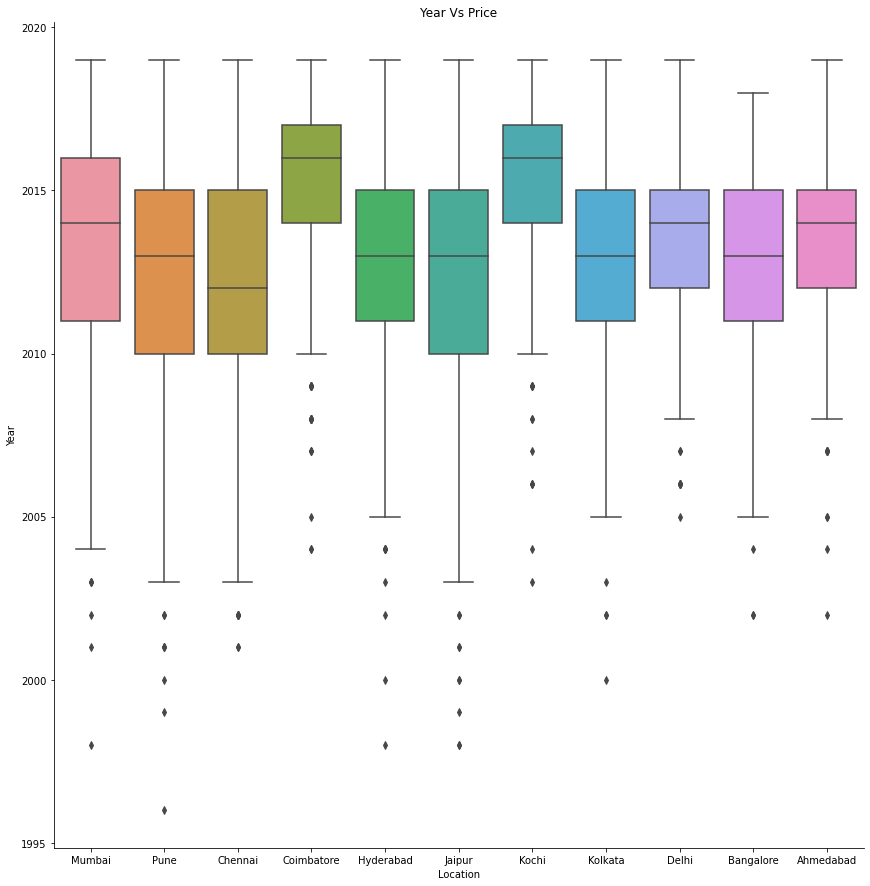

In [41]:
sns.factorplot(x="Location", y="Year", data=df,kind="box",size=12 ,aspect=1)
plt.title('Year Vs Price')
plt.show()


- The above box plot shows that there is almost an equal spread. However, in Coimbatore and Bangalore their median value is lower than others but there is no signifanct effect so it would not really be a major feature.
- This also means that a high spread can be because of more number of higher ranges car in the dataset.

### Before I continue the further analysis I would prefer to adjust the values in the dataset to display better output becuase the outputs do not look completely right to me

In [42]:
# now i am going to split the "Name" column into to three which will be the Brand, Model and the Variant which is just the "Name column" broken into 3

data['Brand']=data['Name'].apply(lambda x:' '.join(x.split()[:1]))
data['Model']=data['Name'].apply(lambda x:' '.join(x.split()[1:2]))
data['Variant']=data['Name'].apply(lambda x:' '.join(x.split()[2:]))
data['Name']=data['Name'].apply(lambda x:' '.join(x.lower() for x in x.split()))
data['Brand']=data['Brand'].apply(lambda x:' '.join(x.lower() for x in x.split()))
data['Model']=data['Model'].apply(lambda x:' '.join(x.lower() for x in x.split()))
data['Variant']=data['Variant'].apply(lambda x:' '.join(x.lower() for x in x.split()))
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
S.No.,,,,,,,,,,,,,,,,
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,maruti,wagon,r lxi cng
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,hyundai,creta,1.6 crdi sx option
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,maruti,ertiga,vdi
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,audi,a4,new 2.0 tdi multitronic


In [43]:
data.groupby(by='Brand')['Mileage'].mean()

Brand
ambassador      12.800
audi            15.414
bentley          9.400
bmw             16.976
chevrolet       18.307
datsun          21.345
fiat            17.859
force           17.000
ford            18.529
hindustan       14.100
honda           18.557
hyundai         19.245
isuzu           12.616
jaguar          14.889
jeep            16.732
lamborghini      6.400
land            12.831
mahindra        15.306
maruti          21.510
mercedes-benz   14.466
mini            18.582
mitsubishi      12.292
nissan          19.230
opelcorsa       14.200
porsche         13.602
renault         20.727
skoda           17.066
smart              nan
tata            19.947
toyota          14.503
volkswagen      18.337
volvo           15.031
Name: Mileage, dtype: float64

In [44]:
brand_list=data.Brand.unique().tolist()

In [45]:
for i in brand_list:
    data.Mileage[(data.Mileage.isnull()) & (data['Brand']==i)]= data.Mileage[(data.Mileage.notnull()) & (data['Brand']==i)].mean()
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
dtype: int64

In [46]:
data.Mileage[data.Mileage.isnull()]=data.Mileage[data.Mileage.notnull()].mean()
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
dtype: int64

In [47]:
data.Mileage=data.Mileage.round(2)

In [48]:
for i in brand_list:
    data.Engine[(data.Engine.isnull()) & (data['Brand']==i)]= data.Engine[(data.Engine.notnull()) & (data['Brand']==i)].mean()
    data.Power[(data.Power.isnull()) & (data['Brand']==i)]= data.Power[(data.Power.notnull()) & (data['Brand']==i)].mean()
data.Seats[data.Seats.isnull()]=int(data.Seats[data.Seats.notnull()].mean())
data.isnull().sum()

# this is to change the not null values and replace them with their mean and from above it shows that the null and missing values from earlier on are not there except for "Power"

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                   0
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
dtype: int64

In [49]:
# Here we are going to remove all missing and not null values, especially in "Power".

data.Power[data.Power.isnull()]=round(data.Power[data.Power.notnull()].mean(),2)
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
dtype: int64

In [50]:
data.Engine.round(2)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
S.No.,,,,,,,,,,,,,,,,
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,maruti,wagon,r lxi cng
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,hyundai,creta,1.6 crdi sx option
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,maruti,ertiga,vdi
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,audi,a4,new 2.0 tdi multitronic


In [51]:
# now we would also do the same thing for new price but however this will be slightly different because Columns should not be dropped in case of a significantly large drop in these metrics because initially I wanted to drop the "New_Price" column which means we will have to treat the new price column and get rid of the missing values

data['New_Price1']= data['New_Price'].apply(lambda x: float(str(x).replace(' Lakh','')) if (str(x).find('Lakh'))!=-1 else (float(str(x).replace(' Cr',''))*100 if (str(x).find('Cr'))!=-1 else 'Nan'))

In [52]:
data.New_Price1[data.New_Price1=='Nan']=np.nan


In [53]:
data['New_Price1']=pd.to_numeric(data['New_Price1'])
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
New_Price1           6247
dtype: int64

In [54]:
# this code will display the updated version of the dataset with the additional columns and also the conversion of from object type to float

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
 15  Variant            7253 non-null   object 
 16  New_Price1         1006 

In [55]:
df_new1=data.copy()

In [56]:
model_list=data.Model.unique()

In [57]:
model_brand=[]
for i in range(0,data.shape[0]):
    if (data.loc[i,'Model'],data.loc[i,'Brand']) not in model_brand:
        model_brand.append((data.loc[i,'Model'],data.loc[i,'Brand']))

In [58]:
len(model_brand)

#length of the objects

222

In [59]:
for i in model_brand:
    df_new1.New_Price1[(df_new1.New_Price1.isnull()) & (df_new1['Model']==i[0]) & (df_new1['Brand']==i[1])]= df_new1.New_Price1[(df_new1.New_Price1.notnull()) & (df_new1['Model']==i[0])& (df_new1['Brand']==i[1])].mean()
df_new1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
New_Price1           1512
dtype: int64

In [60]:
for i in brand_list:
    df_new1.New_Price1[(df_new1.New_Price1.isnull()) & (df_new1['Brand']==i)] = df_new1.New_Price1[(df_new1.New_Price1.notnull()) & (df_new1['Brand']==i)].mean()
df_new1.isnull().sum()

#removing the not null values and the missing values in the column of "New_Price1"

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
Brand                   0
Model                   0
Variant                 0
New_Price1            159
dtype: int64

In [61]:
drop_p=df_new1[df_new1.Price>df_new1.New_Price1].index

In [62]:
df_new1.drop(drop_p,axis=0,inplace=True)

In [63]:
df_new1[df_new1.New_Price1.isnull()==True].index

Int64Index([ 145,  179,  183,  231,  240,  354,  441,  502,  522,  543,
            ...
            6893, 6944, 7032, 7067, 7104, 7111, 7136, 7141, 7223, 7244],
           dtype='int64', name='S.No.', length=159)

In [64]:
df_new1.drop([145,  179,  183,  231,  240,  354,  441,  502,  522,  543, 6893, 6944, 7032, 7067, 7104, 7111, 7136, 7141, 7223, 7244],axis=0,inplace=True)
df_new1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6162
Price                1224
Brand                   0
Model                   0
Variant                 0
New_Price1            139
dtype: int64

In [65]:
# df_new2.drop('New_Price',axis=1,inplace=True)
df_new1.New_Price1=df_new1.New_Price1.round(2)
df_new1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,New_Price1
S.No.,,,,,,,,,,,,,,,,,
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,maruti,wagon,r lxi cng,5.470
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,hyundai,creta,1.6 crdi sx option,16.420
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v,8.610
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,maruti,ertiga,vdi,11.380
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,audi,a4,new 2.0 tdi multitronic,52.980


In [66]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7165 non-null   object 
 1   Location           7165 non-null   object 
 2   Year               7165 non-null   int64  
 3   Kilometers_Driven  7165 non-null   int64  
 4   Fuel_Type          7165 non-null   object 
 5   Transmission       7165 non-null   object 
 6   Owner_Type         7165 non-null   object 
 7   Mileage            7165 non-null   float64
 8   Engine             7165 non-null   float64
 9   Power              7165 non-null   float64
 10  Seats              7165 non-null   float64
 11  New_Price          1003 non-null   object 
 12  Price              5941 non-null   float64
 13  Brand              7165 non-null   object 
 14  Model              7165 non-null   object 
 15  Variant            7165 non-null   object 
 16  New_Price1         7026 

In [67]:
df_new1['Ratio']=df_new1.Price/df_new1.New_Price1

## Continuation of the Multivariate Analysis

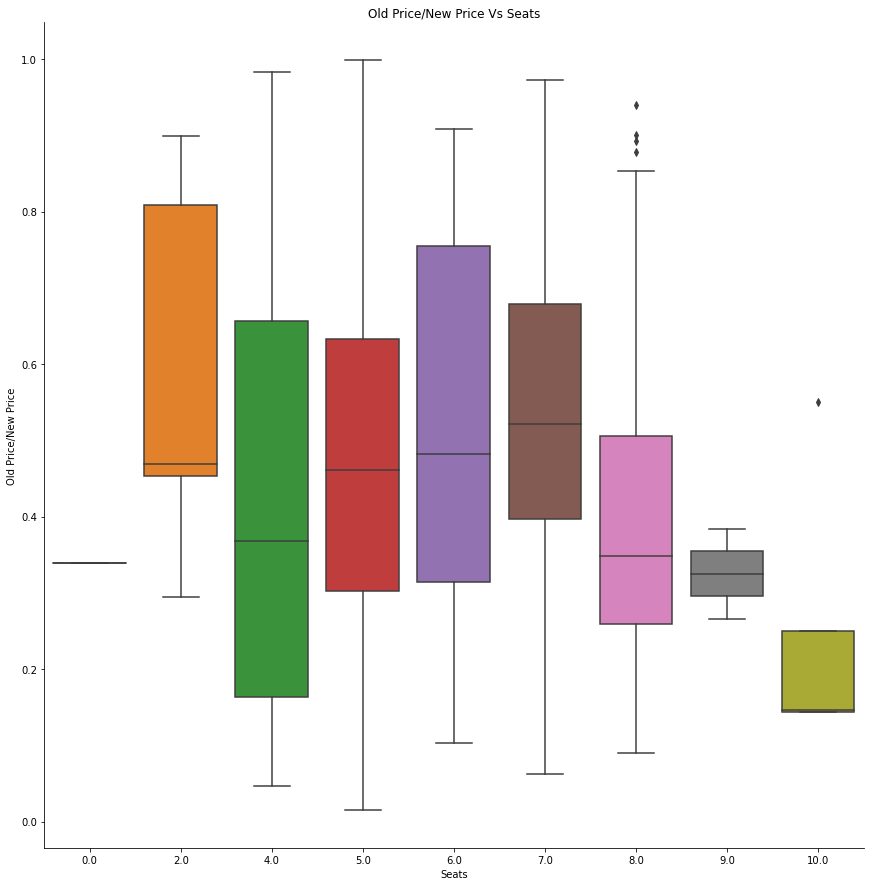

In [68]:
mx = sns.factorplot(y="Ratio", x="Seats", data=df_new1,kind="box",size=12 ,aspect=1)
mx.set(ylabel='Old Price/New Price')
mx.set(xlabel= 'Seats')
plt.title('Old Price/New Price Vs Seats');

#### Observation

- The 2 and 4 seaters cars that have large spread and range is high for 2 seaters but other 5 seaters and above have same spread with lot of outliers in 5 and 7 seaters due to luxury cars. Old_Price to New_Price ratio vs Seats is also same median for 2,5,6,7 seaters around 0.5. So this factor not playing major role in price.

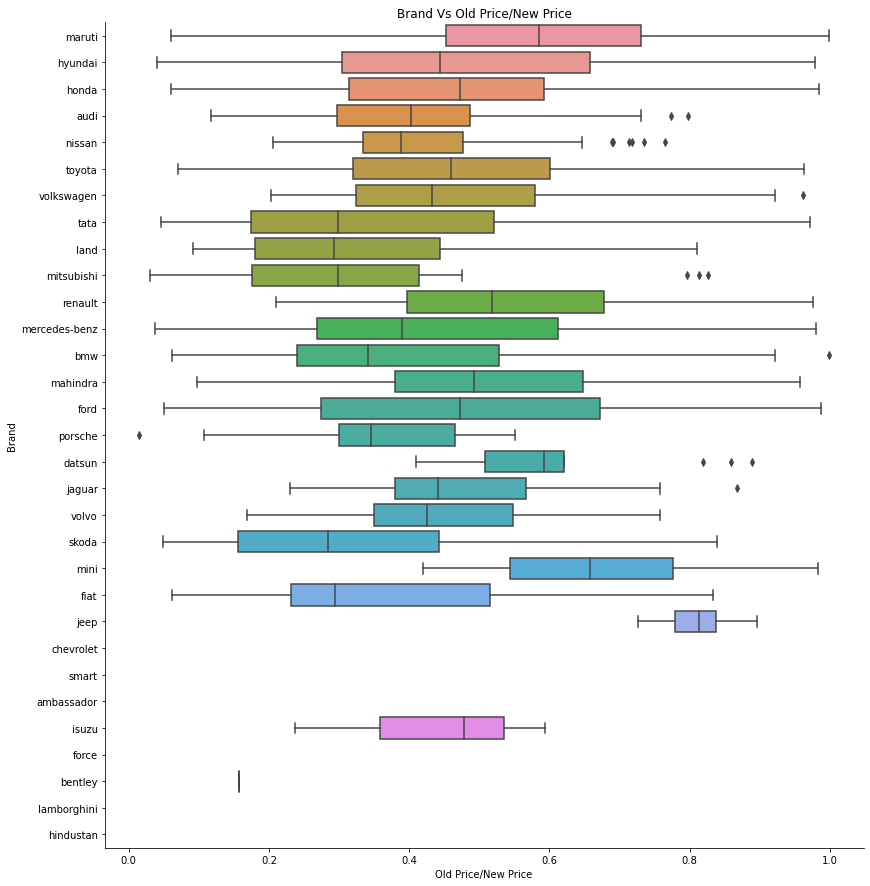

In [69]:
mx = sns.factorplot(x="Ratio", y="Brand", data=df_new1,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Brand')
plt.title('Brand Vs Old Price/New Price');

- From the graph above it reveals that different brands do have different price ranges 

In [70]:
df_new1.Year=pd.Categorical(df_new1.Year)
df_new1.info()

#converting "Year" into categorical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7165 non-null   object  
 1   Location           7165 non-null   object  
 2   Year               7165 non-null   category
 3   Kilometers_Driven  7165 non-null   int64   
 4   Fuel_Type          7165 non-null   object  
 5   Transmission       7165 non-null   object  
 6   Owner_Type         7165 non-null   object  
 7   Mileage            7165 non-null   float64 
 8   Engine             7165 non-null   float64 
 9   Power              7165 non-null   float64 
 10  Seats              7165 non-null   float64 
 11  New_Price          1003 non-null   object  
 12  Price              5941 non-null   float64 
 13  Brand              7165 non-null   object  
 14  Model              7165 non-null   object  
 15  Variant            7165 non-null   object  
 16  New_Pr

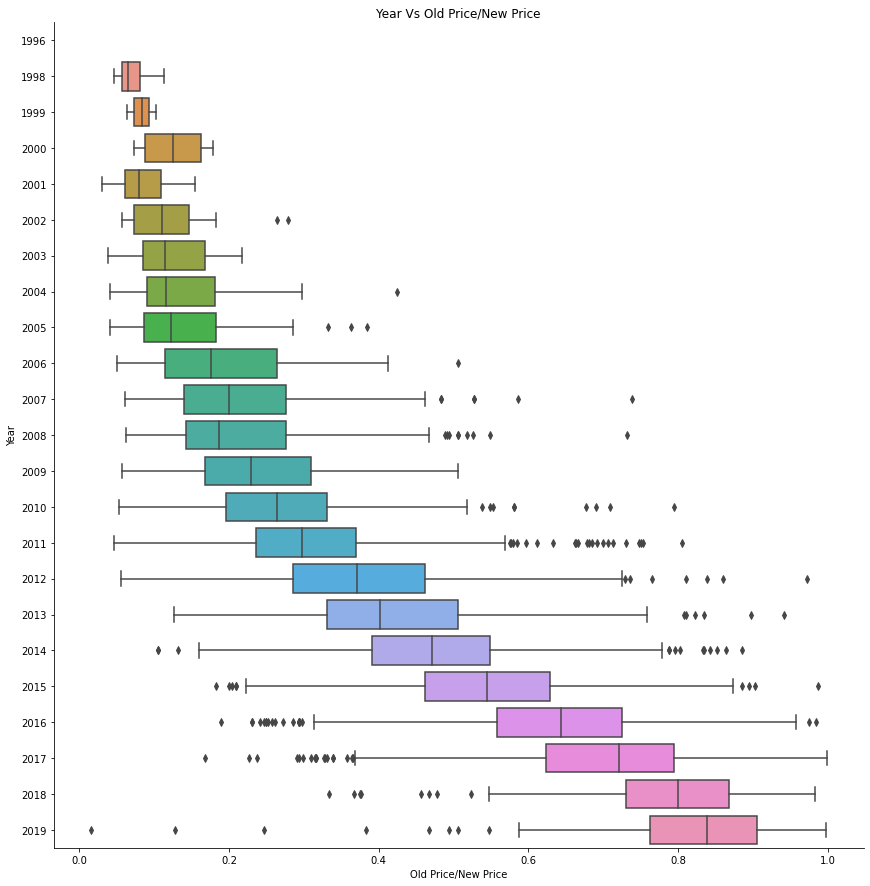

In [71]:
mx = sns.factorplot(x="Ratio", y="Year", data=df_new1,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Year')
plt.title('Year Vs Old Price/New Price');

- This reveals that as the year goes by the price of the cars decrease

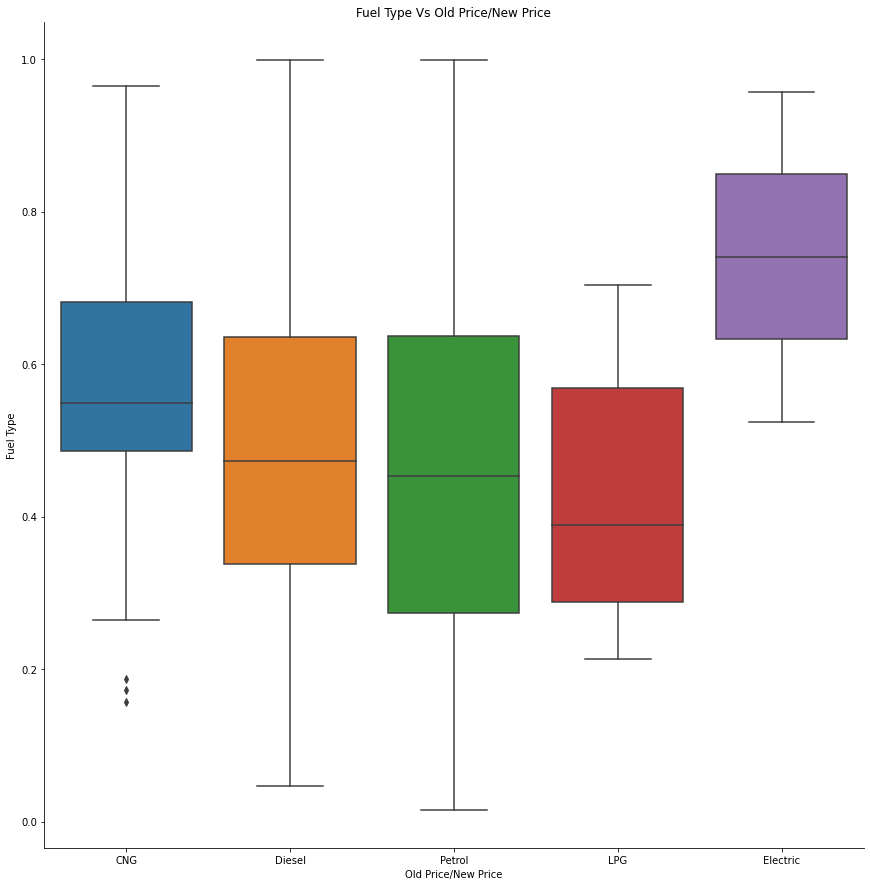

In [72]:
mx = sns.factorplot(y="Ratio", x="Fuel_Type", data=df_new1,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Fuel Type')
plt.title('Fuel Type Vs Old Price/New Price');

In [73]:
# converting the "Year" column to numerical datatype
df_new1.Year=pd.to_numeric(df_new1.Year)

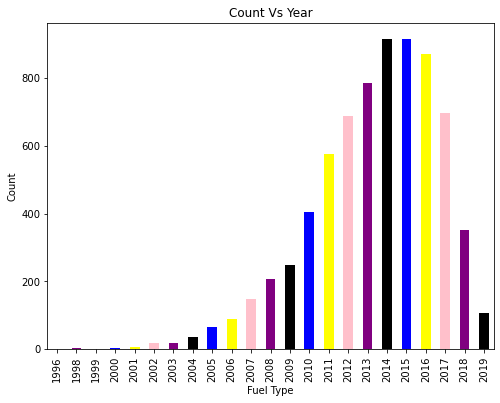

In [74]:
plt.figure(figsize=(8,6))
df_new1['Year'].value_counts().sort_index().plot(x='Year',kind='bar',color=['Pink','Purple','Black','Blue','Yellow'])
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count Vs Year')
plt.show()

- This shows that in the most cars sold is for either diesel or petrol.
- The diesel cars are also the highest amount of cars sold and also in most demand
- The price of fuel_type was probably low in the years 2013-2017
- The peak years for cars in 2014-2015

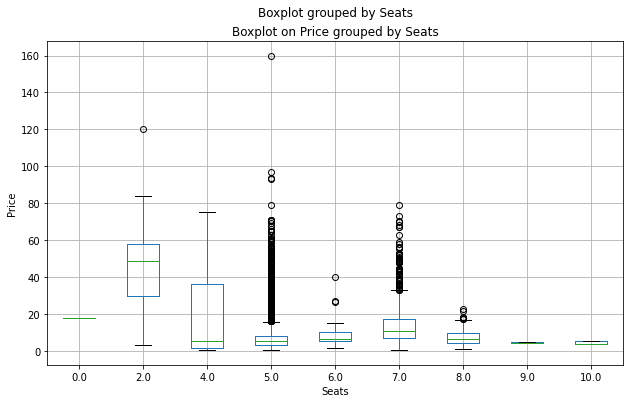

In [75]:
k=df_new1.boxplot(column='Price',by='Seats',fontsize=10,figsize=(10,6),return_type='both')
plt.ylabel('Price')
plt.title('Boxplot on Price grouped by Seats')
plt.show()

## Distribution of Each Numerical Variable

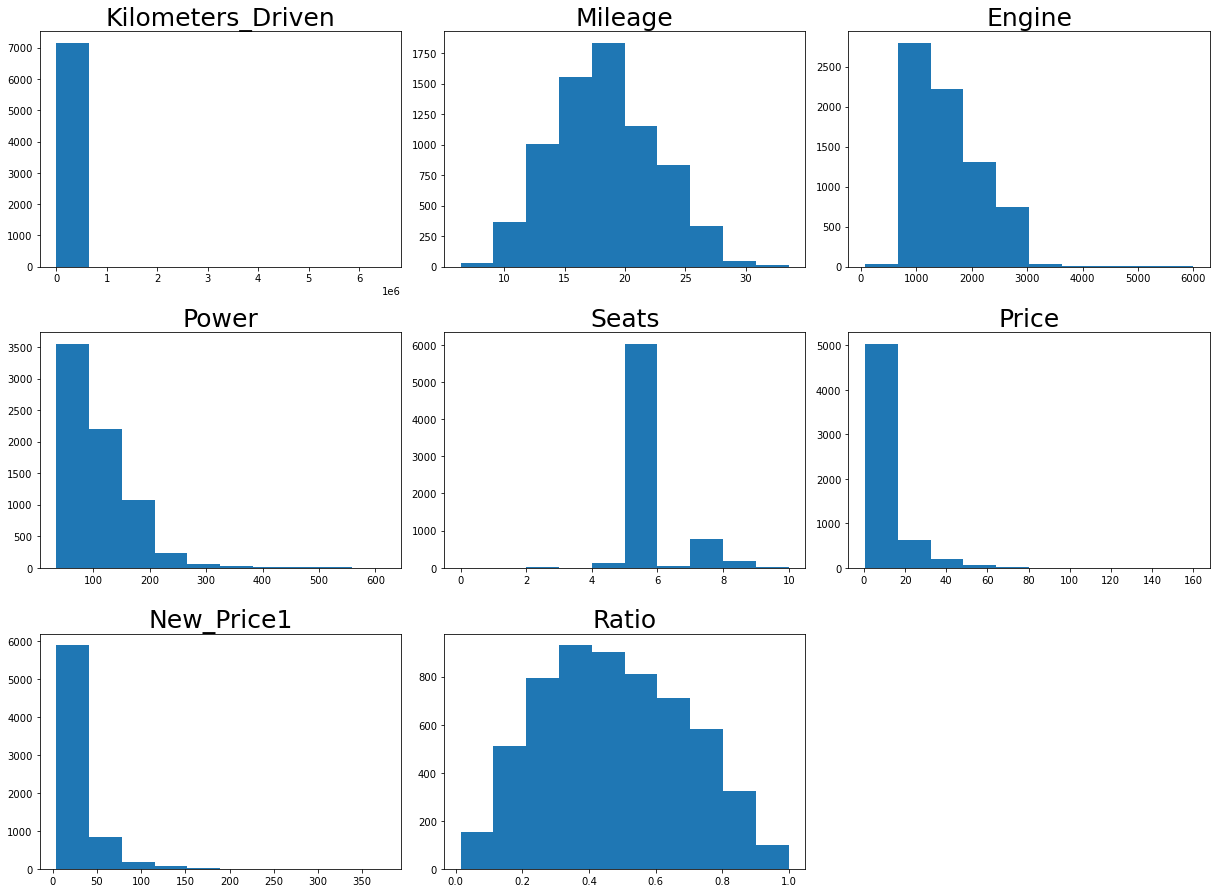

In [76]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df_new1.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df_new1[all_col[i]])
    #sns.displot(df_[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

### General Observation
- Most cars available are mostly 5-6 seaters
- Kilometers_Driven, Power, Engine and New_Price are right skewed .

# Outlier Detection

## Outliers in the Numerical column

In [77]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate():
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

TypeError: enumerate() missing required argument 'iterable' (pos 1)

<Figure size 1440x2160 with 0 Axes>

In [78]:
def seats(i):
    k=df_new1.Price[(df_new1.Seats==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Seats==i)] > up ) | (df_new1.Price[(df_new1.Seats==i)] < lb )
    return l.sum()

In [79]:
#checking for outliers in the numerical column which is "Seats"
un_s=df_new1.Seats.unique()
outlier=[seats(int(j)) for j in un_s]
out_df=pd.DataFrame()
out_df['Seats']=np.array(un_s)
out_df['Outliers']=np.array(outlier)
out_df

,Seats,Outliers
0,5.000,666
1,7.000,56
2,8.000,6
3,4.000,0
4,6.000,3
5,2.000,1
6,10.000,0
7,9.000,0
8,0.000,0


- The most outliers occur with cars with 5 seats 
- There are also outliers in 7 seater cars 
- Most outliers occur in 5 seaters because most cars are 5 seaters int the dataset

In [80]:
desc_seats=df_new1.groupby(by='Seats',as_index=True)['Price'].describe()
desc_seats=pd.DataFrame(desc_seats,index=None)

seats_merge=out_df.merge(desc_seats,on='Seats')

In [81]:
seats_merge.drop(['mean','std'],axis=1).round(2).sort_values(by='Outliers',ascending=False)

,Seats,Outliers,count,min,25%,50%,75%,max
0,5.000,666,4996.000,0.450,3.250,5.100,8.320,160.000
1,7.000,56,662.000,0.600,7.200,10.520,17.500,79.000
2,8.000,6,133.000,0.850,4.400,6.300,9.450,22.550
4,6.000,3,31.000,1.700,5.500,6.500,10.150,40.000
5,2.000,1,14.000,3.000,29.620,48.500,57.790,120.000
3,4.000,0,96.000,0.440,1.660,5.620,36.240,75.000
6,10.000,0,5.000,3.500,3.500,3.650,5.250,5.500
7,9.000,0,3.000,4.100,4.300,4.500,4.620,4.750
8,0.000,0,1.000,18.000,18.000,18.000,18.000,18.000


In [82]:
seats_merge['OutliersbyCount']=np.array(seats_merge['count']/seats_merge.Outliers)
seats_merge.OutliersbyCount=seats_merge.OutliersbyCount.where(seats_merge.OutliersbyCount!=np.inf,0).round(2)
seats_merge.sort_values(by='OutliersbyCount',ascending=False)

,Seats,Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
2,8.000,6,133.000,7.487,4.437,0.850,4.400,6.300,9.450,22.550,22.170
5,2.000,1,14.000,49.528,28.423,3.000,29.625,48.500,57.790,120.000,14.000
1,7.000,56,662.000,14.784,12.530,0.600,7.200,10.525,17.505,79.000,11.820
4,6.000,3,31.000,9.511,8.037,1.700,5.500,6.500,10.155,40.000,10.330
0,5.000,666,4996.000,8.407,9.912,0.450,3.250,5.100,8.325,160.000,7.500
3,4.000,0,96.000,19.694,21.206,0.440,1.660,5.625,36.235,75.000,0.000
6,10.000,0,5.000,4.280,1.005,3.500,3.500,3.650,5.250,5.500,0.000
7,9.000,0,3.000,4.450,0.328,4.100,4.300,4.500,4.625,4.750,0.000
8,0.000,0,1.000,18.000,nan,18.000,18.000,18.000,18.000,18.000,0.000


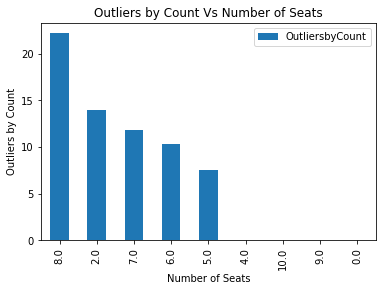

In [83]:
seats_merge.sort_values(by='OutliersbyCount',ascending=False).plot(x='Seats',y='OutliersbyCount',kind='bar')
plt.xlabel('Number of Seats')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Number of Seats')
plt.show()

## Multivariate Analysis

In [84]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7165 non-null   object 
 1   Location           7165 non-null   object 
 2   Year               7165 non-null   int64  
 3   Kilometers_Driven  7165 non-null   int64  
 4   Fuel_Type          7165 non-null   object 
 5   Transmission       7165 non-null   object 
 6   Owner_Type         7165 non-null   object 
 7   Mileage            7165 non-null   float64
 8   Engine             7165 non-null   float64
 9   Power              7165 non-null   float64
 10  Seats              7165 non-null   float64
 11  New_Price          1003 non-null   object 
 12  Price              5941 non-null   float64
 13  Brand              7165 non-null   object 
 14  Model              7165 non-null   object 
 15  Variant            7165 non-null   object 
 16  New_Price1         7026 

### Kilometers_Driven Vs Price

In [85]:
df_new1.Kilometers_Driven[df_new1.Kilometers_Driven==6500000]=650000

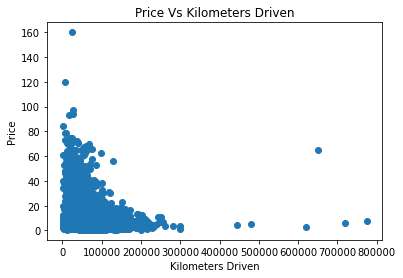

In [86]:
plt.scatter(df_new1.Kilometers_Driven,df_new1.Price)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Price Vs Kilometers Driven')
plt.show()

- This reveal a negative relationship between Km_drive and price. This means km_driven increases with price.

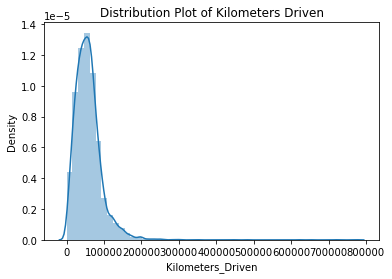

In [87]:
sns.distplot(df_new1.Kilometers_Driven)
plt.title('Distribution Plot of Kilometers Driven')
plt.show()

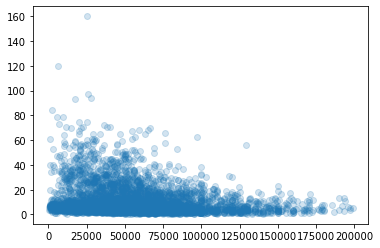

In [88]:
plt.scatter(df_new1.Kilometers_Driven[df_new1.Kilometers_Driven<200000],df_new1.Price[df_new1.Kilometers_Driven<200000],alpha=0.2)
plt.show()

- This graph is rightly skewed which means the mean is higher than the median.
- Kilometers driven we can see majorly cars for resale are in range of 80–100k kms 

### Location

In [89]:
df_new1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Variant', 'New_Price1',
       'Ratio'],
      dtype='object')

In [90]:
def Location(i):
    k=df_new1.Price[(df_new1.Location==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Location==i)] > up ) | (df_new1.Price[(df_new1.Location==i)] < lb )
    return l.sum()

In [91]:
un_s=df_new1.Location.unique()
outlier=[Location(j) for j in un_s]
out_df1=pd.DataFrame()
out_df1['Location']=np.array(un_s)
out_df1['Count_of_Outliers']=np.array(outlier)

In [92]:
out_df1

,Location,Count_of_Outliers
0,Mumbai,87
1,Pune,65
2,Chennai,59
3,Coimbatore,49
4,Hyderabad,95
5,Jaipur,37
6,Kochi,80
7,Kolkata,49
8,Delhi,55
9,Bangalore,21


- Most outliers of cars occured with cars in Hydrebad

In [93]:
desc_loc=df_new1.groupby(by='Location',as_index=True)['Price'].describe()
desc_loc=pd.DataFrame(desc_loc,index=None)

In [94]:
desc_loc['Location']=np.array(desc_loc.index)

In [95]:
df_new1['Location'].value_counts()

Mumbai        939
Hyderabad     865
Kochi         759
Coimbatore    757
Pune          756
Delhi         657
Kolkata       651
Chennai       583
Jaipur        493
Bangalore     432
Ahmedabad     273
Name: Location, dtype: int64

### Count of Outliers vs Location

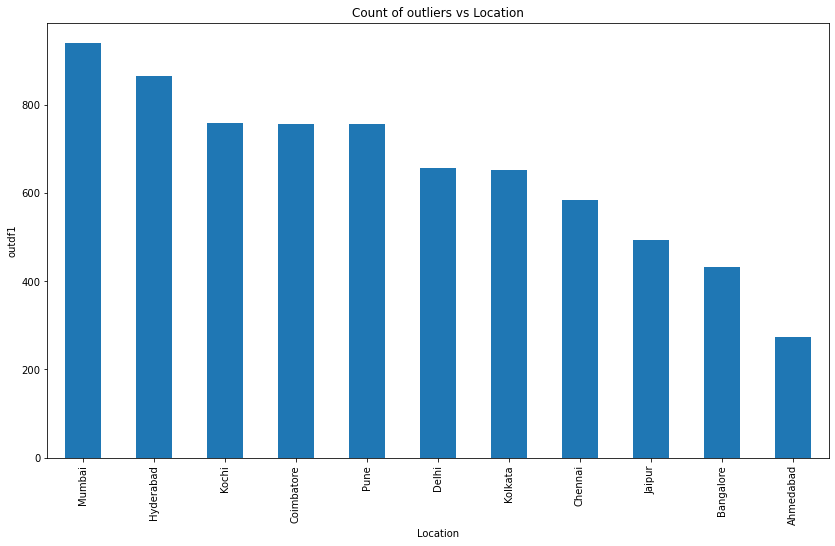

In [96]:
ax = df_new1['Location'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of outliers vs Location")
ax.set_xlabel("Location")
ax.set_ylabel("outdf1")
plt.show()

### Boxplot Grouped by Location with Price

Text(0, 0.5, 'Price')

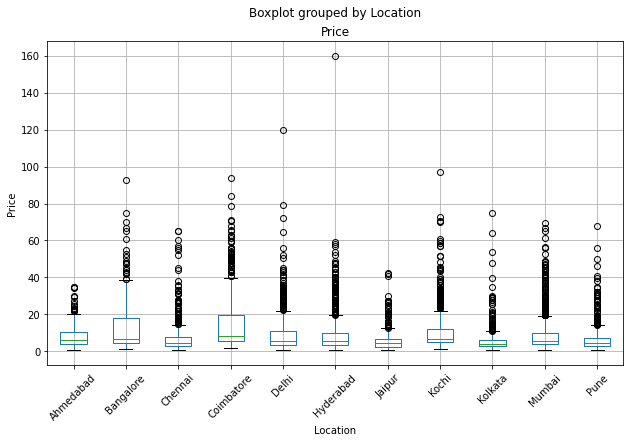

In [97]:
df_new1.boxplot(column='Price',by='Location',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')

In [98]:
df_new1.groupby(by='Year')['Price'].mean().index

Int64Index([1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019],
           dtype='int64', name='Year')

Text(0, 0.5, 'Price')

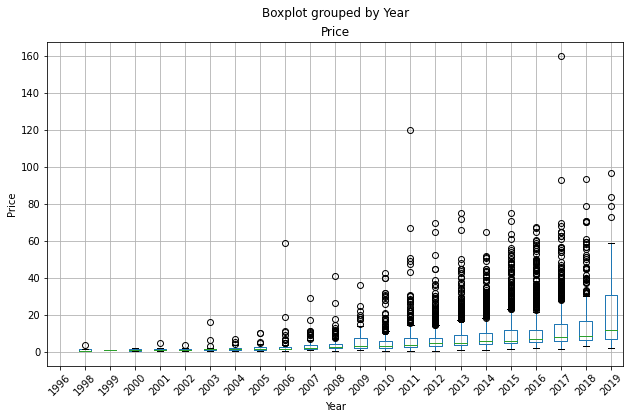

In [99]:
df_new1.boxplot(column='Price',by='Year',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')

Text(0, 0.5, 'Model Year')

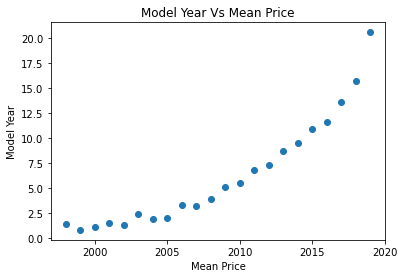

In [100]:
plt.scatter(x=df_new1.groupby(by='Year')['Price'].mean().index,y=df_new1.groupby(by='Year')['Price'].mean().values)
plt.title('Model Year Vs Mean Price')
plt.xlabel('Mean Price')
plt.ylabel('Model Year')

## Year

In [101]:
def Year(i):
    k=df_new1.Price[(df_new1.Year==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Year==i)] > up ) | (df_new1.Price[(df_new1.Year==i)] < lb )
    return l.sum()

In [102]:
un_s=df_new1.Year.unique()
outlier=[Year(j) for j in un_s]
out_df2=pd.DataFrame()
out_df2['Year']=np.array(un_s)
out_df2['Count_of_Outliers']=np.array(outlier)

In [103]:
out_df2

,Year,Count_of_Outliers
0,2010,40
1,2015,94
2,2011,39
3,2012,76
4,2013,88
5,2016,109
6,2018,48
7,2014,120
8,2017,83
9,2007,11


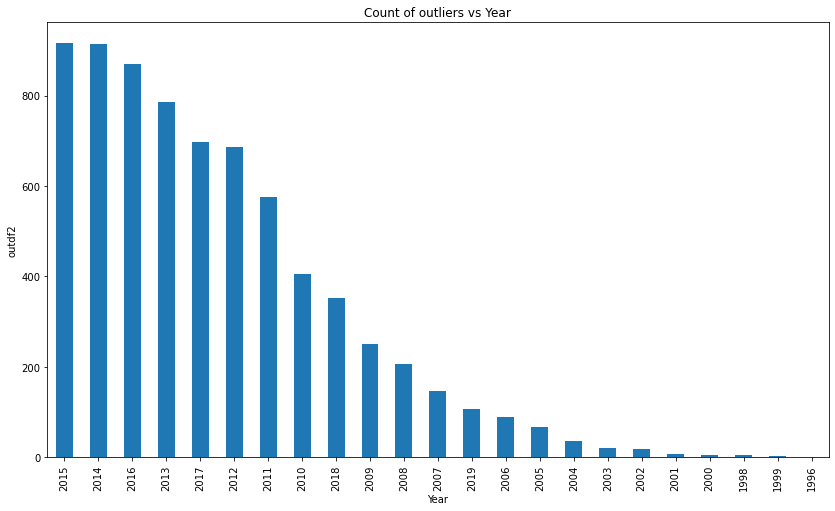

In [104]:
ax = df_new1['Year'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of outliers vs Year")
ax.set_xlabel("Year")
ax.set_ylabel("outdf2")
plt.show()

- The most outliers occur in the years 2014 - 2015

In [105]:
df_new1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Variant', 'New_Price1',
       'Ratio'],
      dtype='object')

### Fuel

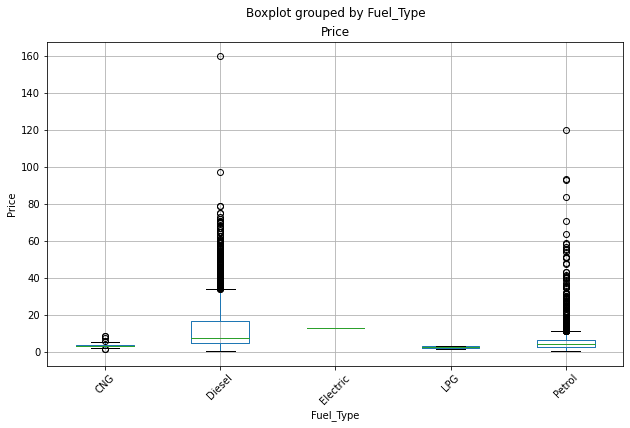

In [106]:
df_new1.boxplot(column='Price',by='Fuel_Type',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by fuel type')

In [107]:
def fuel(i):
    k=df_new1.Price[(df_new1.Fuel_Type==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Fuel_Type==i)] > up ) | (df_new1.Price[(df_new1.Fuel_Type==i)] < lb )
    return l.sum()

In [108]:
un_s=df_new1.Fuel_Type.unique()
outlier=[fuel(j) for j in un_s]
out_df3=pd.DataFrame()
out_df3['Fuel_Type']=np.array(un_s)
out_df3['Count_of_Outliers']=np.array(outlier)

In [109]:
desc_f=df_new1.groupby(by='Fuel_Type',as_index=True)['Price'].describe()
desc_f=pd.DataFrame(desc_f,index=None)


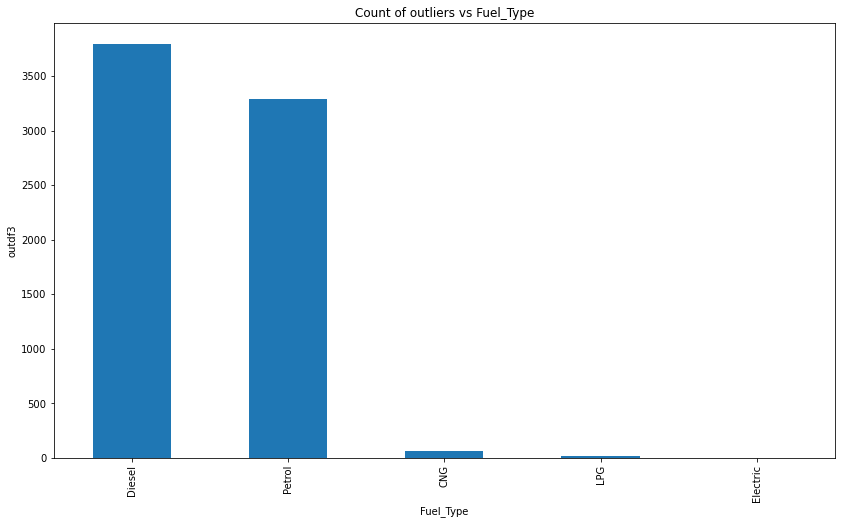

In [110]:
ax = df_new1['Fuel_Type'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of outliers vs Fuel_Type")
ax.set_xlabel("Fuel_Type")
ax.set_ylabel("outdf3")
plt.show()

- The data shows for most cars for sold is diesel and petrol and for diesel cars price is highest spread followed by petrol.
- The automatic cars have higher price range and as owner type is increasing price of car is decreasing.
- These variables can play important role in our model building.

### Count of Outliers by Seats

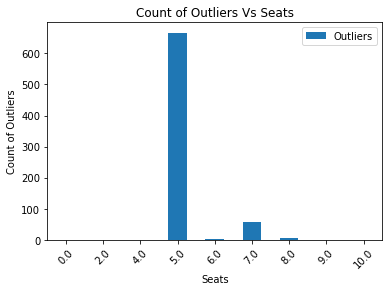

In [111]:
out_df.sort_values(by='Seats').plot(x='Seats',y='Outliers',kind='bar',rot=45)
plt.xlabel('Seats')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Seats')
plt.show()

## Transmission

### Boxplot Grouped by Transmission and Price

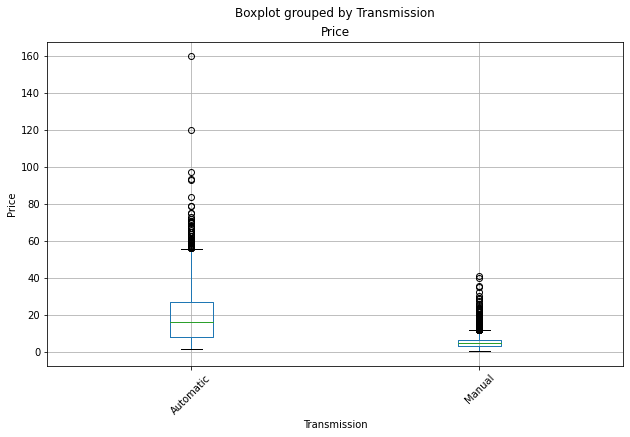

In [113]:
df_new1.boxplot(column='Price',by='Transmission',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by Transmission')

In [114]:
def Trans(i):
    k=df_new1.Price[(df_new1.Transmission==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Transmission==i)] > up ) | (df_new1.Price[(df_new1.Transmission==i)] < lb )
    return l.sum()

In [115]:
un_s=df_new1.Transmission.unique()
outlier=[Trans(j) for j in un_s]
out_df4=pd.DataFrame()
out_df4['Transmission']=np.array(un_s)
out_df4['Count_of_Outliers']=np.array(outlier)

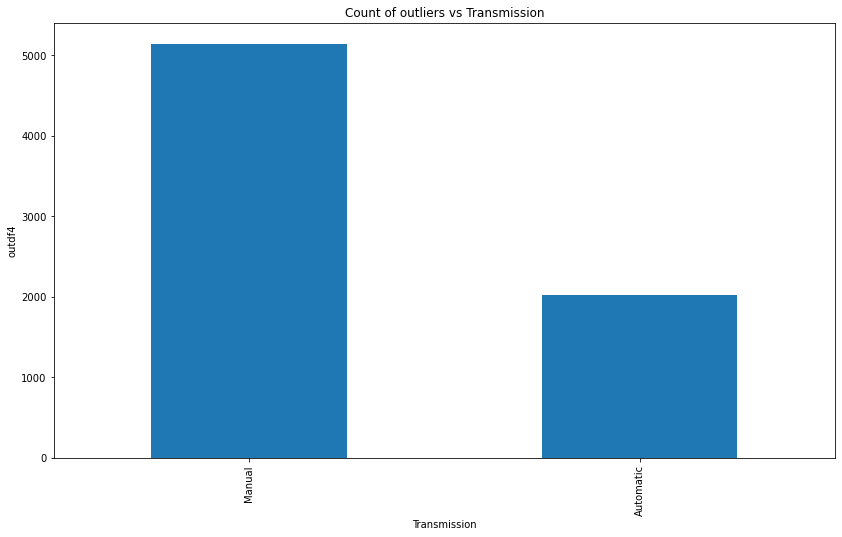

In [116]:
ax = df_new1['Transmission'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of outliers vs Transmission")
ax.set_xlabel("Transmission")
ax.set_ylabel("outdf4")
plt.show()

- There are more manual cars in the dataset
- More Outliers in automatic cars

### Owner_Type Vs Price Seggregated by Transmission

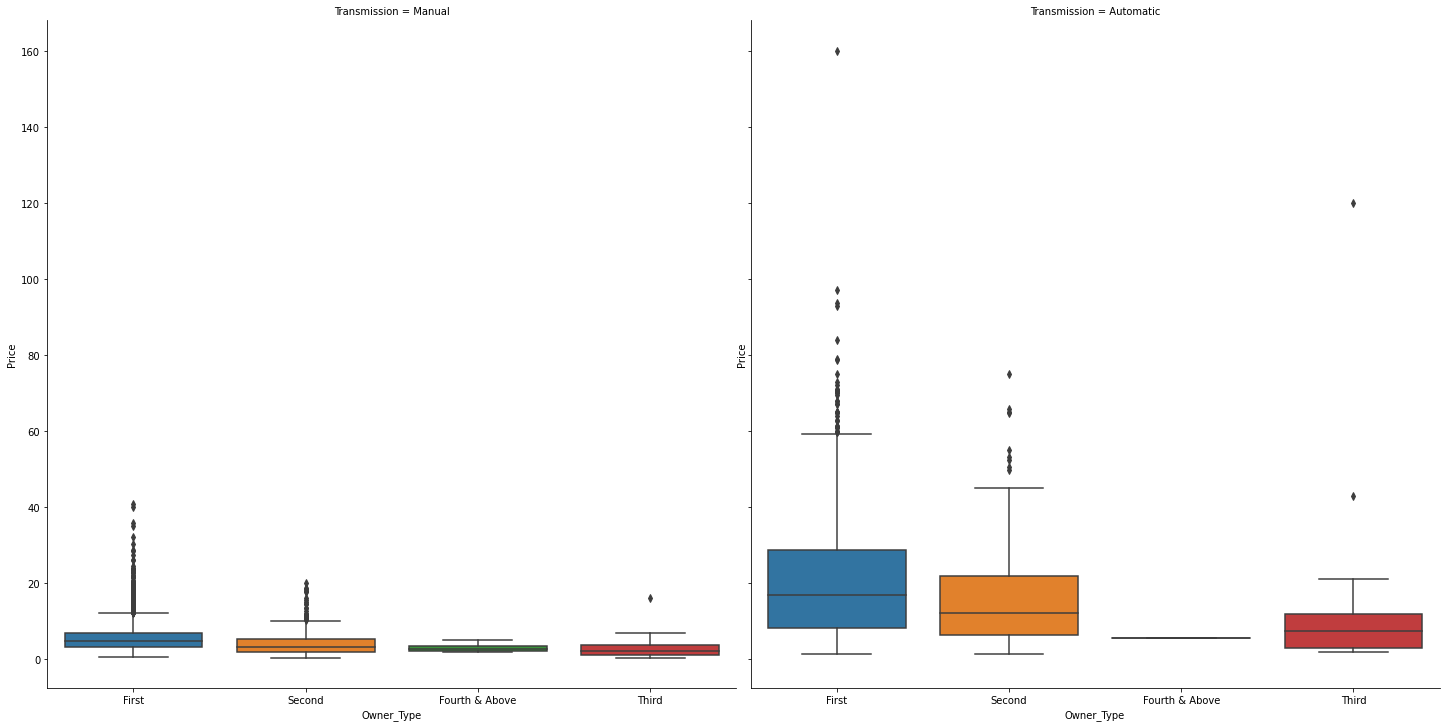

In [117]:
mx = sns.factorplot(x="Owner_Type", y="Price", data=df_new1, kind="box",col='Transmission', size=10 ,aspect=1)
mx.set(xlabel='Owner_Type')
mx.set(ylabel= 'Price')
plt.savefig('Owner_Type vs Price--segg by Transmission')

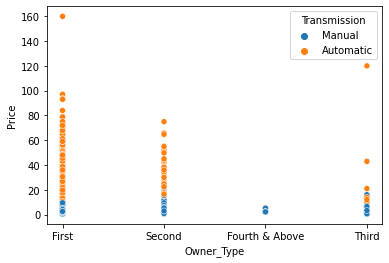

In [118]:
sns.scatterplot(data=df_new1, x='Owner_Type', y='Price', hue='Transmission')
plt.show()

In [119]:
manual=df_new1[df_new1.Transmission=='Manual']
auto=df_new1[df_new1.Transmission=='Automatic']

In [120]:
manual.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Variant', 'New_Price1',
       'Ratio'],
      dtype='object')

In [121]:
manual.groupby(by='Location')['Location'].count().index.tolist()

['Ahmedabad',
 'Bangalore',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Mumbai',
 'Pune']

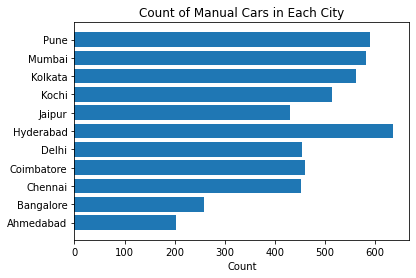

In [122]:
plt.barh(manual.groupby(by='Location')['Location'].count().index.tolist(),manual.groupby(by='Location')['Location'].count().values.tolist())
# manual.sort_values(by='Location').plot(x='Location',y='Count of Outliers',kind='bar',rot=45)
plt.title('Count of Manual Cars in Each City')
plt.xlabel('Count')
plt.show()

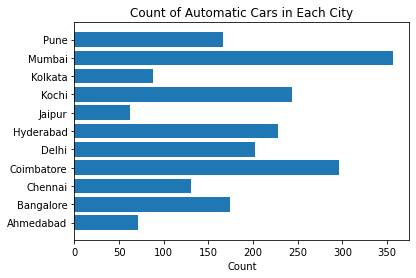

In [123]:
plt.barh(auto.groupby(by='Location')['Location'].count().index.tolist(),auto.groupby(by='Location')['Location'].count().values.tolist())
plt.title('Count of Automatic Cars in Each City')
plt.xlabel('Count')
plt.show()

#### Observations
- The most amount of Manual Cars are available in Hyderabad
- the most amount of automatic cras are in Mumbai
- The most most cars in the dataset are automatic cars
- Most of the the automatic and manual cars have an ownership type of first owner.

In [124]:
df_new1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Variant', 'New_Price1',
       'Ratio'],
      dtype='object')

## Brand

In [125]:
def brand(i):
    k=df_new1.Price[(df_new1.Brand==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new1.Price[(df_new1.Brand==i)] > up ) | (df_new1.Price[(df_new1.Brand==i)] < lb )
    return l.sum()

In [126]:
un_s=df_new1.Transmission.unique()
outlier=[brand(j) for j in un_s]
out_df6=pd.DataFrame()
out_df6['Brand']=np.array(un_s)
out_df6['Count_of_Outliers']=np.array(outlier)

In [127]:
desc_b=df_new1.groupby(by='Brand',as_index=True)['Price'].describe()


In [128]:
desc_b=pd.DataFrame(desc_b,index=None)
desc_b['Brand']=np.array(desc_b.index)

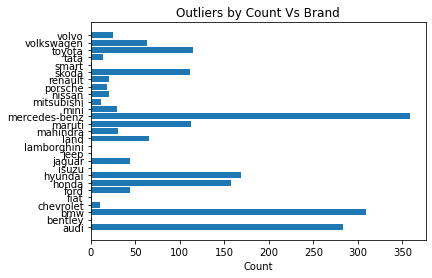

In [129]:
plt.barh(auto.groupby(by='Brand')['Brand'].count().index.tolist(),auto.groupby(by='Brand')['Brand'].count().values.tolist())
plt.title('Outliers by Count Vs Brand')
plt.xlabel('Count')
plt.show()

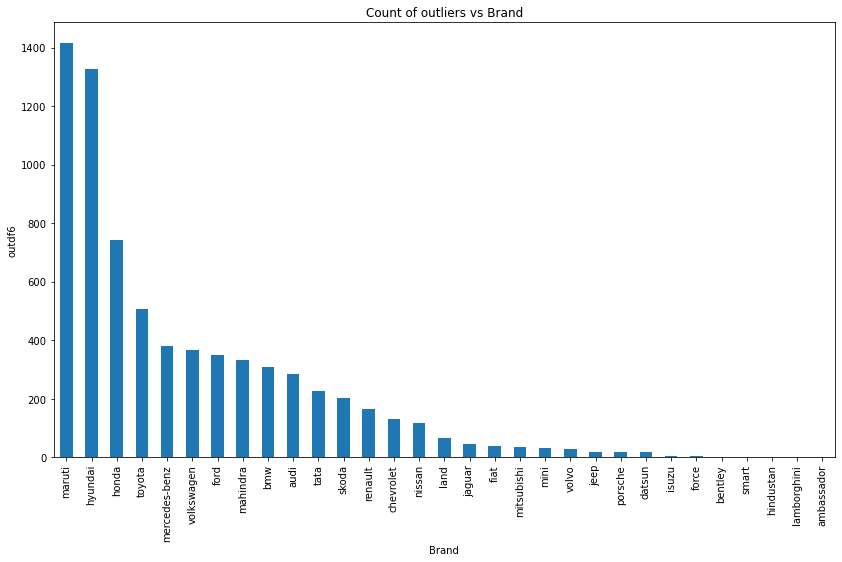

In [130]:
ax = df_new1['Brand'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of outliers vs Brand")
ax.set_xlabel("Brand")
ax.set_ylabel("outdf6")
plt.show()

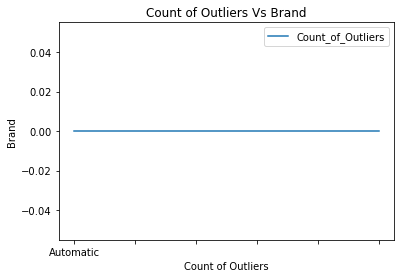

In [131]:
out_df6.sort_values(by='Brand').plot(x='Brand',y='Count_of_Outliers')
plt.ylabel('Brand')
plt.xlabel('Count of Outliers')
plt.title('Count of Outliers Vs Brand')
plt.show()

## Power Vs Price with Hue: Transmission

Text(0.5, 1.0, 'Power Vs Price')

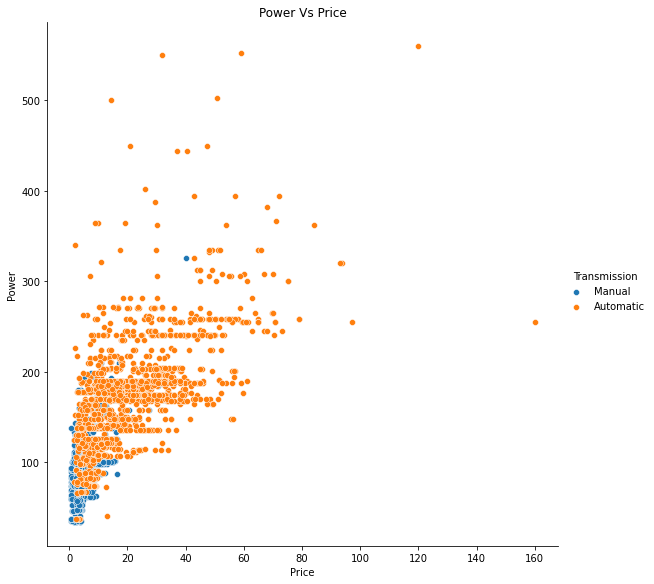

In [132]:
sns.FacetGrid(df_new1,hue='Transmission',size=8)\
    .map(sns.scatterplot,"Price","Power")\
    .add_legend()
plt.title('Power Vs Price')

Observation: Power has high correlation linear with price and above 300 HP only automatic cars there.

## Price Vs Mileage with Hue: Transmission

Text(0.5, 1.0, 'Mileage Vs Price')

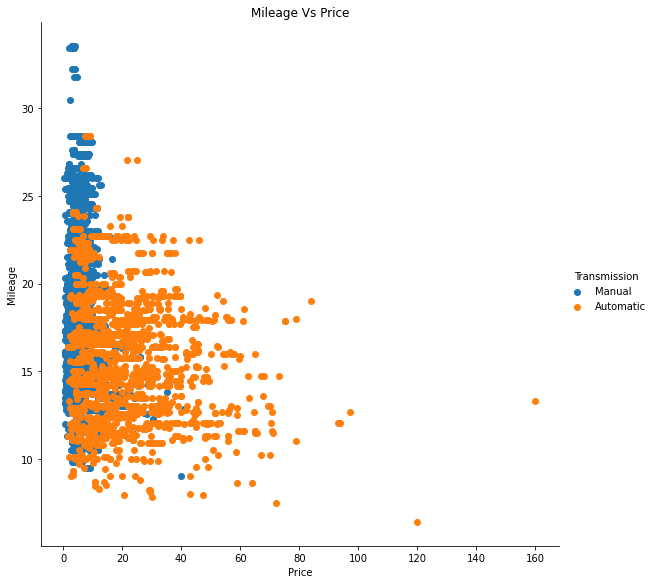

In [133]:
sns.FacetGrid(df_new1,hue='Transmission',size=8)\
    .map(plt.scatter,"Price","Mileage")\
    .add_legend()
plt.title('Mileage Vs Price')

Observation:Mileage spread is not giving any linear relationship. The thing we can notice is automatic cars has higher range as saw before also.

## Engine Vs Price with Hue: Transmission

Text(0.5, 1.0, 'Engine Vs Price')

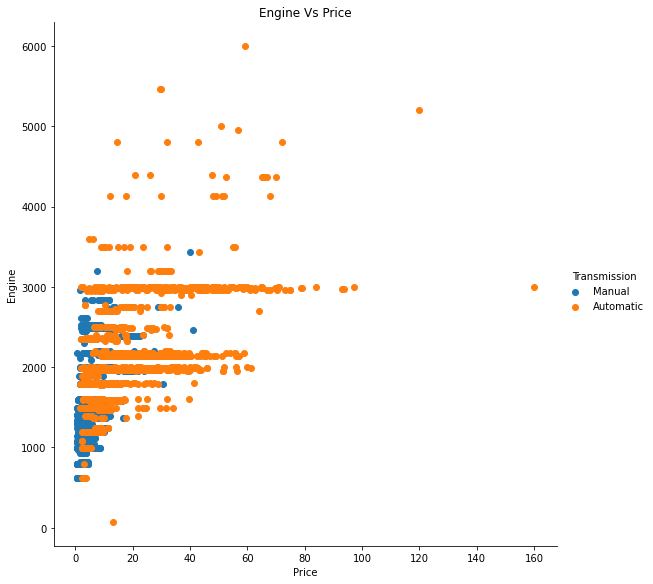

In [134]:
sns.FacetGrid(df_new1,hue='Transmission',size=8)\
    .map(plt.scatter,"Price","Engine")\
    .add_legend()
plt.title('Engine Vs Price')


- Engine also has high correlation linear with price and above 3000 cc only automatic cars there. So, let’s see engine and power correlation also if they both are also highly correlated

- As, we can see engine and power are highly correlated which can cause multi collinearity. While moving to model building we have to do test for multi collinearity and remove one of them if they are dependent on each other to apply linear regression model.

## Power Vs Price with Hue: Owner_Type

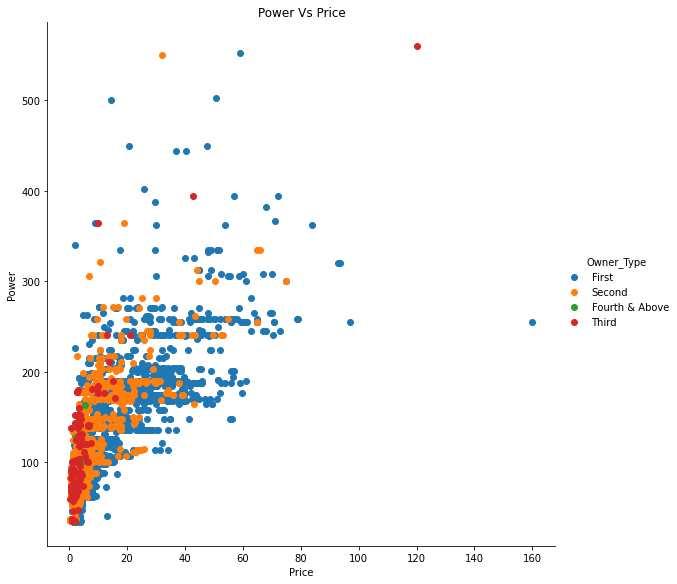

In [135]:
sns.FacetGrid(df_new1,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Power")\
    .add_legend()
plt.title('Power Vs Price')
plt.savefig('Power Vs Price on owner_type')

Text(0.5, 1.0, 'Mileage Vs Price')

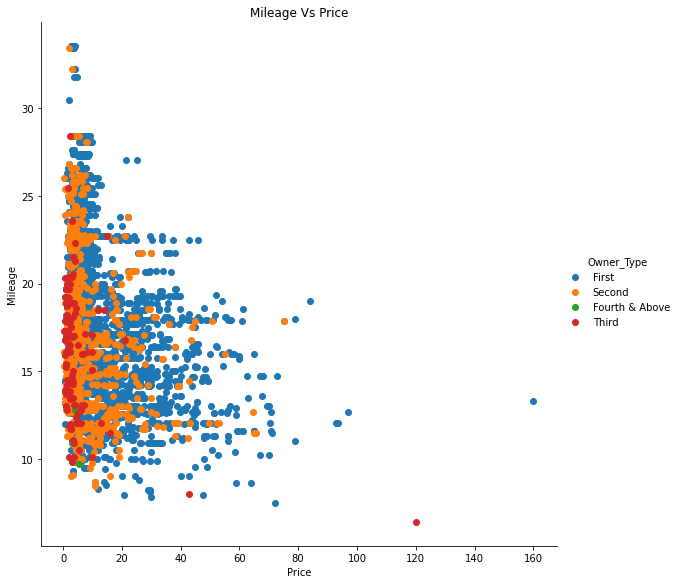

In [136]:
sns.FacetGrid(df_new1,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Mileage")\
    .add_legend()
plt.title('Mileage Vs Price')

Text(0.5, 1.0, 'Engine Vs Price')

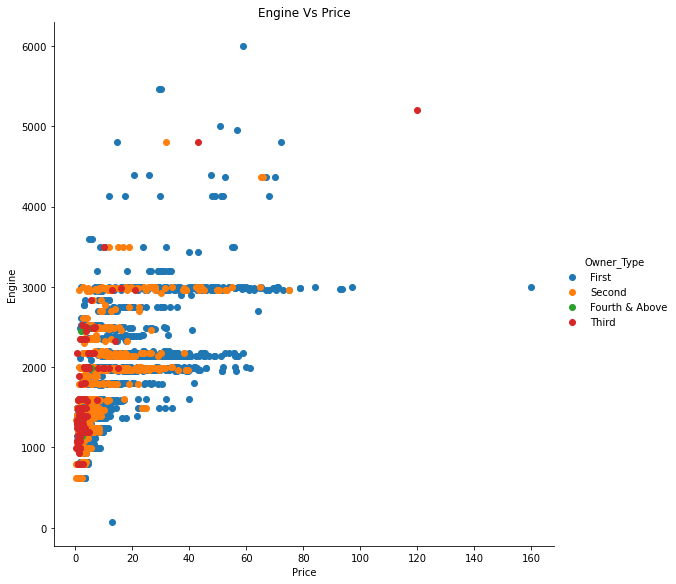

In [137]:
sns.FacetGrid(df_new1,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Engine")\
    .add_legend()
plt.title('Engine Vs Price')


In [138]:
data_loc=pd.DataFrame(df.groupby(['Location'])[['Kilometers_Driven']].mean())
data_loc

,Kilometers_Driven
Location,
Ahmedabad,55272.251
Bangalore,57181.632
Chennai,87688.283
Coimbatore,47030.867
Delhi,56569.973
Hyderabad,70239.702
Jaipur,72144.729
Kochi,45407.003
Kolkata,43529.913


In [139]:
loc=np.array(df['Location'].unique())
loc

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [140]:
loc.sort(axis=0)

In [141]:
data_loc['Location']=np.array(loc)

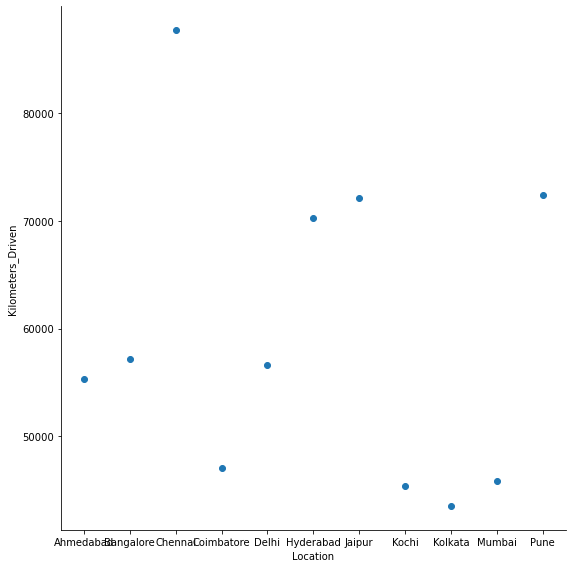

In [142]:
sns.FacetGrid(data_loc,size=8)\
    .map(plt.scatter,"Location","Kilometers_Driven")\
    .add_legend();
plt.show()

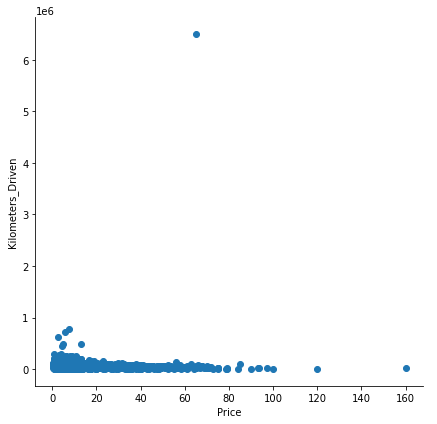

In [143]:
sns.FacetGrid(df,size=6)\
    .map(plt.scatter,"Price","Kilometers_Driven")\
    .add_legend()

In [144]:
np.corrcoef(df['Power'],df['Kilometers_Driven'])

array([[1.        , 0.02914398],
       [0.02914398, 1.        ]])

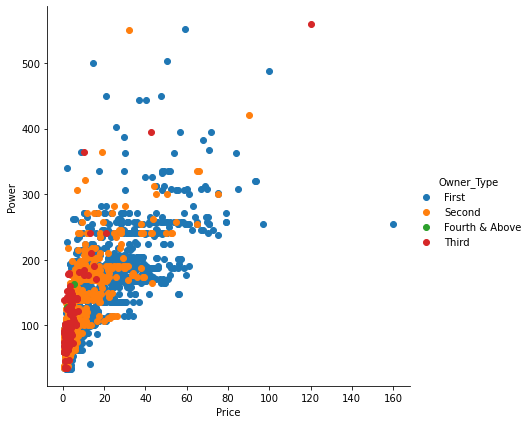

In [145]:
sns.FacetGrid(df,hue='Owner_Type',size=6)\
    .map(plt.scatter,"Price","Power")\
    .add_legend()

## Correlation Heatmap of Numerical Data

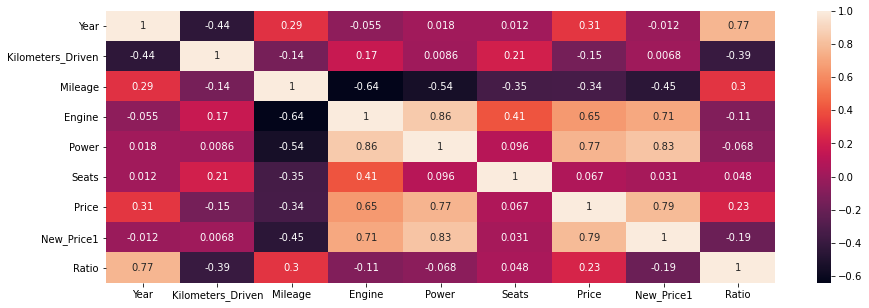

In [146]:
#heatmap that shows the correlation between numerical parameters
plt.figure(figsize=(15,5))
sns.heatmap(df_new1.corr(),annot=True)
plt.show()

## Pairplot

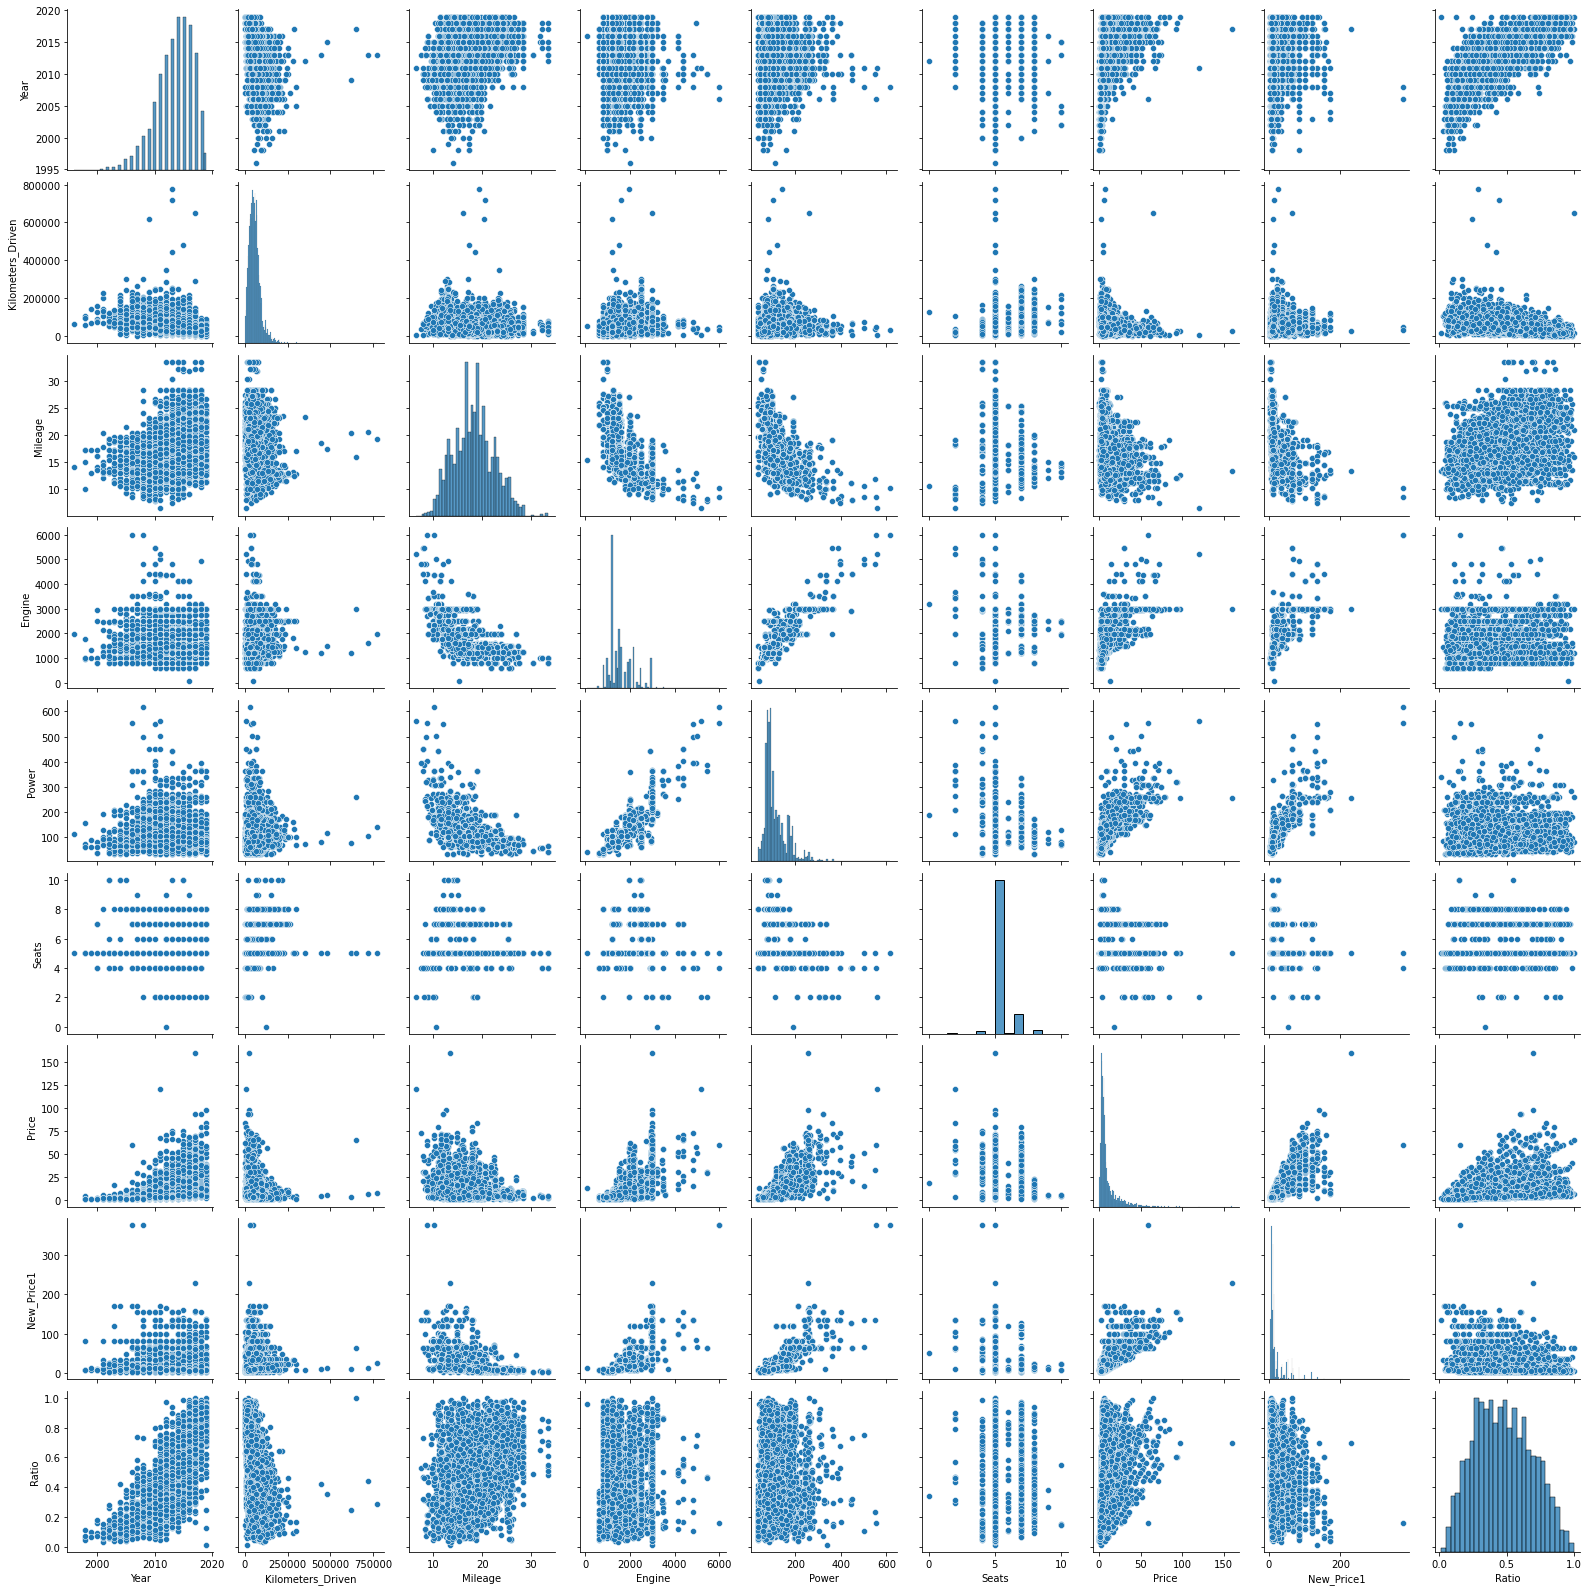

In [147]:
subset=df_new1.iloc[:,:]
sns.pairplot(subset)
plt.show()

# Model Building

In [148]:
df_new1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,New_Price1,Ratio
S.No.,,,,,,,,,,,,,,,,,,
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,maruti,wagon,r lxi cng,5.470,0.320
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,hyundai,creta,1.6 crdi sx option,16.420,0.761
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v,8.610,0.523
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,maruti,ertiga,vdi,11.380,0.527
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,audi,a4,new 2.0 tdi multitronic,52.980,0.335


In [234]:

df_new1.dropna(how='all')
#dropped all missing values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,New_Price1,Ratio
S.No.,,,,,,,,,,,,,,,,,,
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,maruti,wagon,r lxi cng,5.470,0.320
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,hyundai,creta,1.6 crdi sx option,16.420,0.761
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v,8.610,0.523
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,maruti,ertiga,vdi,11.380,0.527
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,audi,a4,new 2.0 tdi multitronic,52.980,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,volkswagen vento diesel trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,NaN,nan,volkswagen,vento,diesel trendline,13.300,nan
7249,volkswagen polo gt tsi,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,NaN,nan,volkswagen,polo,gt tsi,10.020,nan
7250,nissan micra diesel xv,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,NaN,nan,nissan,micra,diesel xv,8.530,nan


In [225]:
#defining x and y variables
X=df_new1.drop(['Name','New_Price','Location','Fuel_Type','Transmission','Owner_Type','Brand','Model','Variant','New_Price1'], axis=1)
y=df_new1[['Price']]

print(X.head())
print(y.head())

       Year  Kilometers_Driven  Mileage   Engine   Power  Seats  Price  Ratio
S.No.                                                                        
0      2010              72000   26.600  998.000  58.160  5.000  1.750  0.320
1      2015              41000   19.670 1582.000 126.200  5.000 12.500  0.761
2      2011              46000   18.200 1199.000  88.700  5.000  4.500  0.523
3      2012              87000   20.770 1248.000  88.760  7.000  6.000  0.527
4      2013              40670   15.200 1968.000 140.800  5.000 17.740  0.335
       Price
S.No.       
0      1.750
1     12.500
2      4.500
3      6.000
4     17.740


In [226]:
print(X.shape)
print(y.shape)

(7165, 8)
(7165, 1)


## Create Dummy Variables


In [227]:
dummy = pd.get_dummies(df_new1[['Kilometers_Driven','Mileage','Engine','Power','Seats','Price','Ratio']], drop_first=True)
dummy

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ratio
S.No.,,,,,,,
0,72000,26.600,998.000,58.160,5.000,1.750,0.320
1,41000,19.670,1582.000,126.200,5.000,12.500,0.761
2,46000,18.200,1199.000,88.700,5.000,4.500,0.523
3,87000,20.770,1248.000,88.760,7.000,6.000,0.527
4,40670,15.200,1968.000,140.800,5.000,17.740,0.335
...,...,...,...,...,...,...,...
7248,89411,20.540,1598.000,103.600,5.000,nan,nan
7249,59000,17.210,1197.000,103.600,5.000,nan,nan
7250,28000,23.080,1461.000,63.100,5.000,nan,nan


In [255]:
dummy.dropna()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ratio
S.No.,,,,,,,
0,72000,26.600,998.000,58.160,5.000,1.750,0.320
1,41000,19.670,1582.000,126.200,5.000,12.500,0.761
2,46000,18.200,1199.000,88.700,5.000,4.500,0.523
3,87000,20.770,1248.000,88.760,7.000,6.000,0.527
4,40670,15.200,1968.000,140.800,5.000,17.740,0.335
...,...,...,...,...,...,...,...
6013,70602,25.800,1498.000,98.600,5.000,4.830,0.562
6014,27365,28.400,1248.000,74.000,5.000,4.750,0.603
6015,100000,24.400,1120.000,71.000,5.000,4.000,0.501


In [257]:
dm=dummy.dropna()
dm

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ratio
S.No.,,,,,,,
0,72000,26.600,998.000,58.160,5.000,1.750,0.320
1,41000,19.670,1582.000,126.200,5.000,12.500,0.761
2,46000,18.200,1199.000,88.700,5.000,4.500,0.523
3,87000,20.770,1248.000,88.760,7.000,6.000,0.527
4,40670,15.200,1968.000,140.800,5.000,17.740,0.335
...,...,...,...,...,...,...,...
6013,70602,25.800,1498.000,98.600,5.000,4.830,0.562
6014,27365,28.400,1248.000,74.000,5.000,4.750,0.603
6015,100000,24.400,1120.000,71.000,5.000,4.000,0.501


In [232]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [233]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ratio
S.No.,,,,,,,,
3152,2013,67000,19.010,1461.000,108.450,5.000,4.750,0.328
5876,2017,23700,17.500,1373.000,80.460,7.000,8.250,0.725
3503,2016,24025,18.150,1198.000,82.000,6.000,4.100,0.530
2574,2011,83000,20.540,1598.000,103.600,5.000,2.900,0.218
4191,2015,28000,15.730,1968.000,174.330,5.000,23.750,0.521


# Choose Model, Train and Evaluate

In [247]:
df1=df.copy()

In [253]:
df1=df1.dropna()
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,New_Price1
S.No.,,,,,,,,,,,,,,,,,
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,honda,jazz,v,8.610
7,toyota innova crysta 2.8 gx at 8s,Mumbai,2016,36000,Diesel,Automatic,First,11.360,2755.000,171.500,8.000,21 Lakh,17.500,toyota,innova,crysta 2.8 gx at 8s,21.000
10,maruti ciaz zeta,Kochi,2018,25692,Petrol,Manual,First,21.560,1462.000,103.250,5.000,10.65 Lakh,9.950,maruti,ciaz,zeta,10.650
15,mitsubishi pajero sport 4x4,Delhi,2014,110000,Diesel,Manual,First,13.500,2477.000,175.560,7.000,32.01 Lakh,15.000,mitsubishi,pajero,sport 4x4,32.010
20,bmw 3 series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.690,1995.000,190.000,5.000,47.87 Lakh,18.550,bmw,3,series 320d,47.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,tata bolt revotron xt,Chennai,2016,10000,Petrol,Manual,First,17.570,1193.000,88.700,5.000,7.77 Lakh,4.000,tata,bolt,revotron xt,7.770
6002,volkswagen vento 1.6 highline,Mumbai,2011,38000,Petrol,Manual,First,16.090,1598.000,103.500,5.000,11.91 Lakh,3.250,volkswagen,vento,1.6 highline,11.910
6005,maruti vitara brezza vdi,Pune,2016,37208,Diesel,Manual,First,24.300,1248.000,88.500,5.000,9.93 Lakh,7.430,maruti,vitara,brezza vdi,9.930


In [258]:
dfe = pd.concat([df1,dm], axis=1)

In [262]:
dfe.drop(.drop(['Name','New_Price','Location','Fuel_Type','Transmission','Brand','Model','Variant','New_Price1'], axis=1)

SyntaxError: invalid syntax (<ipython-input-262-9b25031e09c3>, line 1)

In [221]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ratio
S.No.,,,,,,,,
6885,2008,88000,12.050,2179.000,120.000,8.000,nan,nan
5295,2010,72400,20.360,1197.000,78.900,5.000,2.300,0.208
2755,2013,33793,18.400,1198.000,86.800,5.000,3.740,0.570
5854,2016,28147,18.900,1197.000,81.860,5.000,5.070,0.766
109,2014,40000,22.320,1582.000,126.320,5.000,5.250,0.371


In [235]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').